# Summary 
A K-means cluster analysis was conducted to identify subgroups of variables from a collection of 11 categorical and quantitative predictor variables that best predicted a quantitative response variable measuring the perception of the US economy.


## The research question is 
 **To what extent is the perception of the US situation associated with the level of income ?**

## The variables of interest in our research question
"W1_P20 is the Personnal Annual income")
"W1_G2 is the US economy's situation")
"W1_F1 is the Percentage of how the respondants think about the future")
Explanatory variables :

**Target is the US economy's situation**, this variable has been managed previously. The _W1_G2_ variable has been transformed into a two level categorical variable, called **economy_situation**.

** The variables used in the analysis are the following :**
Predictors (Xi) that we have tested:
- W1_A1 How interested are you in what’s going on in government and politics?
- W1_C1: Generally speaking, do you usually think of yourself as a Democrat, a Republican, an Independent, or something else?
- W1_P20 Which of the following income groups includes YOUR personal annual income (Do not include the income of other members of your household)?
- PPAGE: Age
- PPINCIMP: Household Income
- W1_P11: Is anyone in your household currently unemployed?
- PPETHM: Race / Ethnicity
- W1_F1 When you think about your future, are you generally optimistic, pessimistic, or neither optimistic nor pessimistic?
- PPETHM: Race / Ethnicity
- W1_D1 : [Barack Obama] How would you rate
- W1_A12 Do you approve or disapprove of the way Barack Obama is handling his job as President?
- W1_M1: What is your religion?

Data were randomly split into a training set that included 70% of the observations and a test set that included 30% of the observations. All clustering variables were standardized to have a mean of 0 and a standard deviation of 1. 

A series of k-means cluster analyses were conducted on the training data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret. 

In [17]:
# First thing set the working directory - it is done by setting it in the folder
# icon to the right;

# Next step is to import all the library we will need

# Libraries

import pandas as pd
import numpy as np
import seaborn as sns  # for plots
import matplotlib.pyplot as plt  # as plt
import statsmodels.formula.api as smf  # statsmodels
import statsmodels.stats.multicomp as multi  # statsmodels and posthoc test
import statsmodels.api as sm  # Statsmodel for the qqplots
import scipy.stats  # For the Chi-Square test of independance

# Machine learning libraries
# Libraries for decision trees

from pandas import Series, DataFrame
import os

import sklearn.metrics

from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
#from sklearn.linear_model import lassoLarsCV
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC



# Feature Importance - for the random trees
from sklearn import datasets
from sklearn.ensemble import ExtraTreesClassifier


# Feature importance - for the Kmeans
from sklearn import preprocessing
from sklearn.cluster import KMeans


import graphviz
from pandas.core import datetools

In [18]:
# Importing the dataset
df = pd.read_csv("ool_pds.csv", low_memory=False)

In [19]:
"""
Data management
"""
df["W1_P20"] = df["W1_P20"].replace(-1, np.nan)
df["W1_G2"] = df["W1_G2"].replace(-1, np.nan)
df["W1_F1"] = df["W1_F1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(-1, np.nan)
df["W1_D1"] = df["W1_D1"].replace(998, np.nan)
df["W1_A12"] = df["W1_A12"].replace(-1, np.nan)
df["W1_C1"] = df["W1_C1"].replace(-1, np.nan)
df["W1_A1"] = df["W1_A1"].replace(-1, np.nan)
df["W1_M1"] = df["W1_M1"].replace(-1, np.nan)
df["W1_P11"] = df["W1_P11"].replace(-1, np.nan)
df["PPINCIMP"] = df["PPINCIMP"].replace(-1 , np.nan)
df["PPINCIMP"] = df["PPINCIMP"].replace(-2, np.nan)
df["PPETHM"] = df["PPETHM"].replace(-1, np.nan)
df["PPETHM"] = df["PPETHM"].replace(-2, np.nan)

In [20]:
df_clean = df.dropna()

In [21]:
# Subset - data frame that contains only the variables we will need --> we call it cluster
cluster = df_clean[["W1_A1", "W1_C1", "W1_P20", "PPAGE", "PPINCIMP", "W1_P11", "PPETHM"]]
cluster.describe()

,W1_A1,W1_C1,W1_P20,PPAGE,PPINCIMP,W1_P11,PPETHM
count,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000,1935.000000
mean,2.636693,2.171576,9.079070,48.837726,10.998450,1.611886,1.795349
std,1.150872,0.718005,4.978906,16.311076,4.877878,0.487447,0.813205
min,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,5.000000,36.000000,8.000000,1.000000,1.000000
50%,3.000000,2.000000,9.000000,50.000000,12.000000,2.000000,2.000000
75%,3.000000,3.000000,13.000000,62.000000,15.000000,2.000000,2.000000
max,5.000000,4.000000,19.000000,81.000000,19.000000,2.000000,5.000000


In [22]:
"""
In a cluster analysis variables with large values contribute more to the distance calculations. 
Variables measured on different scales should be standardized prior to clustering, 
so that the solution is not driven by variables measured on larger scales. 
We will standardize the clustering variables to have a mean of 0, and a standard deviation of 1.
"""
# Standerdized clustering variables to have a mean = 0 and sd = 1
# Let's create a copy of the dataset
clustervar = cluster.copy

from sklearn import preprocessing


clustervar=cluster.copy()
clustervar["W1_A1"]=preprocessing.scale(clustervar["W1_A1"].astype('float64'))
clustervar["W1_C1"]=preprocessing.scale(clustervar["W1_C1"].astype('float64'))
clustervar["W1_P20"]=preprocessing.scale(clustervar["W1_P20"].astype('float64'))
clustervar["PPAGE"]=preprocessing.scale(clustervar["PPAGE"].astype('float64'))
clustervar["PPINCIMP"]=preprocessing.scale(clustervar["PPINCIMP"].astype('float64'))
clustervar["W1_P11"]=preprocessing.scale(clustervar["W1_P11"].astype('float64'))
clustervar["PPETHM"]=preprocessing.scale(clustervar["PPETHM"].astype('float64'))

In [23]:
# Let's split the data into train and test sets
clus_train, clus_test = train_test_split(clustervar, test_size = 0.3, random_state = 123) # random_state = 123 for reproducibility


In [24]:
# Now we can run our cluster analysis
# we will use it to calculate the average distance of
# the observations from the cluster centroids.

from scipy.spatial.distance import cdist

# We will use this object when we specify the number of clusters we want to test,
# which will give us the cluster solutions for k equals 1 to k equals 9 clusters

clusters = range(1,10)


# this will be used to store the average distance values that we will calculate for
# the 1 to 9 cluster solutions 
meandist = []


# The for k in clusters: code tells Python to run the cluster analysis code below for
# each value of k in the cluster's object.
for k in clusters:                 # for looping
    model = KMeans(n_clusters = k) # number of clusters 1 -> 9
    model.fit(clus_train)          # model.predict asks that the results of the cluster analyses
                                   # stored in the model object be used to predict the closest cluster that each
                                   # observation belongs to...
    clusassign = model.predict(clus_train) # clusassign that will store for each observation
                                           # the cluster number to which it was assigned based on the cluster analysis.
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, "euclidean"), axis = 1)) #  computes the average
                                                                                                  #  of the sum of the distances between each observation in the cluster centroids
    / clus_train.shape[0])
    

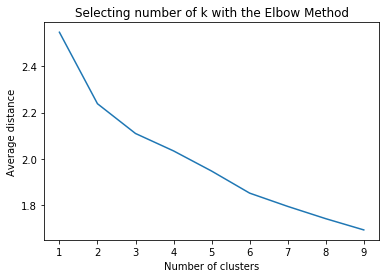

In [25]:
# Now we can plot the elbow curve
plt.plot(clusters, meandist)
plt.xlabel("Number of clusters")
plt.ylabel("Average distance")
plt.title("Selecting number of k with the Elbow Method")
plt.show()

When interpreting the elbow graph, it would make more since to consider that there are 2 clusters.
The elbow curve was somewhat inconclusive, suggesting that the 2, and 4-cluster solutions might be interpreted. The results below are for an interpretation of the 2-cluster solution.


In [26]:
# Interpreting the 2 clusters solution
model2 = KMeans(n_clusters = 2)
model2.fit(clus_train)
clusassign = model2.predict(clus_train)

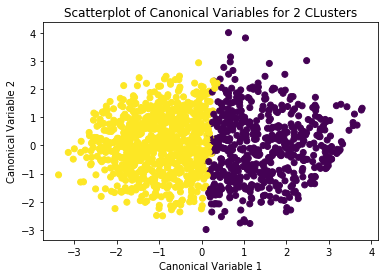

'\nHere is the scatter plot.\n What this shows is that these two clusters are densely packed,\n meaning that the observations within the clusters are pretty highly correlated with\n each other, and within cluster variance is relatively low.\n But they appear to have a good deal of overlap,\n meaning that there is not good separation between these two clusters.\n On the other hand, this cluster here shows better separation, but\n the observations are more spread out indicating less correlation among\n the observations and higher within cluster variance.\n\n'

In [27]:
"""
Canonical Discriminant Analysis
- Creates a smaller number of variables.
- Linear combinations of clustering variables.
- Canonical variables are ordered by proportion of variance accounted for.
- Majority of variance is accounted for by first few canonical variables.
"""

# Plotting the clusters
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x = plot_columns[:,0], y = plot_columns[:, 1], c = model2.labels_,)
plt.xlabel("Canonical Variable 1")
plt.ylabel("Canonical Variable 2")
plt.title("Scatterplot of Canonical Variables for 2 CLusters")
plt.show()

"""
Here is the scatter plot.
 What this shows is that these two clusters are densely packed,
 meaning that the observations within the clusters are pretty highly correlated with
 each other, and within cluster variance is relatively low.
 But they appear to have a good deal of overlap,
 meaning that there is not good separation between these two clusters.
 On the other hand, this cluster here shows better separation, but
 the observations are more spread out indicating less correlation among
 the observations and higher within cluster variance.

"""

Above is the scatter plot for the two-cluster solution. Canonical discriminant analyses was used to reduce the 11 clustering variable down a few variables that accounted for most of the variance in the clustering variables. A scatterplot of the first two canonical variables by cluster (Graph shown above) indicated that the observations in clusters 1 and 2 were not densely packed with relatively low high cluster variance, and did not overlap very much with the other cluster. 

This graph shows that these two clusters are not densely packed, meaning that the observations within the clusters are not highly correlated with each other, and within cluster variance is relatively high. There appear not to have an overlap, this implies that there is an adequate separation between these two clusters. The observations are more spread out indicating less correlation among the observations and higher within cluster variance. This suggests that the two-cluster solution might be a better solution.